<a href="https://colab.research.google.com/github/goeckslab/MarkerIntensityPredictor/blob/main/KNN_Phenotype_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook the check the cell neighbor phenotypes

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [77]:
phenotypes = pd.read_csv("mapped_phenotypes.csv")

# shift column Base cell to first position in df 
first_column = phenotypes.pop('Base Cell')
phenotypes.insert(0, 'Base Cell', first_column)
phenotypes


,Base Cell,1,2,3,4,5,6
0,Basal,Basal,Basal,Basal,Basal,Basal,Basal
1,Basal,Basal,Basal,Basal,Basal,Basal,Basal
2,Basal,Basal,Basal,Basal,Basal,Basal,Basal
3,Basal,Basal,Basal,Basal,Basal,Basal,Basal
4,Basal,Basal,Basal,Basal,Basal,Basal,Basal
...,...,...,...,...,...,...,...
27522,Basal,Basal,Basal,Basal,Basal,Basal,Basal
27523,Basal,Basal,Basal,Basal,Basal,Basal,Basal
27524,Basal,Basal,Basal,Basal,Basal,Basal,Basal
27525,Basal,Basal,Basal,Basal,Basal,Immune,Basal


In [78]:
# Load nearest neighbor indices

In [79]:
nni = pd.read_csv('nearest_neighbor_indices.csv')
nni = nni.T
nni.rename(columns={0:"Base Cell"}, inplace=True)
print(nni)


       Base Cell      1      2      3      4      5      6
0              0  17014   5849  26672   6841  25626  26608
1              1   5858     14  26258     46    756  25065
2              2      5     18   5665  13168  26324  12767
3              3   5993     10   1925    655   2601  13184
4              4     10   2601   5993     11   5894   6083
...          ...    ...    ...    ...    ...    ...    ...
27522      27522  26724  26919  26718  27504  26968  27075
27523      27523  26777  26901  27524  26732  26721  26775
27524      27524  27508  26901  26712  27523  27021  27477
27525      27525  27524  27039  17440  10958   5111  26699
27526      27526  26581  26570  26526  24908  26640  27469

[27527 rows x 7 columns]


In [80]:
data = pd.read_csv("HTA9-2_Bx1_HMS_Tumor_quant.csv")
data["Phenotype"] = phenotypes["Base Cell"]
data.head()

,CellID,DAPI_1_cellMasks,AF488_cellMasks,AF555_cellMasks,AF647_cellMasks,DAPI_2_cellMasks,ERK1_1_cellMasks,ERK1_2_cellMasks,RAD51_cellMasks,DAPI_3_cellMasks,...,p21_nucleiMasks,DAPI_7_nucleiMasks,CK14_nucleiMasks,AR_nucleiMasks,cPARP_nucleiMasks,DAPI_8_nucleiMasks,CK17_nucleiMasks,CK7_nucleiMasks,HER2_nucleiMasks,Phenotype
0,1,18399.201646,1938.308642,951.753086,1536.115226,6840.255144,1285.267490,883.053498,1218.925926,14302.860082,...,514.773663,94.288066,2164.238683,379.246914,2489.053498,198.650206,2298.633745,141.518519,2568.308642,Basal
1,2,13872.480000,1933.280000,895.360000,1496.160000,6647.280000,1241.400000,864.480000,1408.320000,14804.480000,...,523.680000,95.720000,2175.960000,381.560000,2500.080000,192.200000,2289.400000,141.720000,2591.960000,Basal
2,3,10940.505263,11353.252632,788.294737,4166.000000,119.452632,898.242105,379.168421,823.926316,143.189474,...,532.494737,151.168421,2197.578947,385.263158,2720.484211,198.568421,2344.273684,146.221053,2580.915789,Basal
3,4,10590.968254,8699.428571,714.428571,2570.920635,117.904762,926.841270,395.603175,832.333333,130.253968,...,530.190476,143.365079,2167.571429,389.269841,2527.301587,191.000000,2328.047619,141.492063,2569.523810,Basal
4,5,16300.946429,8819.517857,916.303571,2854.267857,74.678571,884.607143,391.196429,792.589286,72.625000,...,515.517857,76.339286,2162.750000,387.678571,2485.535714,183.214286,2314.357143,140.392857,2573.964286,Basal


## Display phenotypes in biopsy

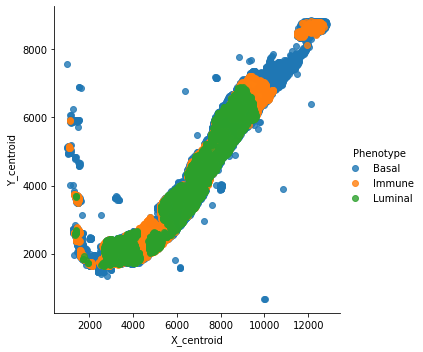

In [81]:
sns.lmplot(x='X_centroid', y='Y_centroid', data=data, hue='Phenotype', fit_reg=False)

# Specify cell index to select all neighbors and investigate the neighbor hood

In [82]:
cell_index_to_evaluate = 2500
neighbor_indices = nni[nni["Base Cell"] == cell_index_to_evaluate]
phenotype_indices = phenotypes.loc[[cell_index_to_evaluate]]

print(neighbor_indices)
print(phenotype_indices)

      Base Cell      1      2      3    4      5      6
2500       2500  25592  24669  17397  623  26483  26652
     Base Cell      1      2      3      4      5      6
2500     Basal  Basal  Basal  Basal  Basal  Basal  Basal


In [83]:
cells = data.loc[neighbor_indices.values[0].tolist()][["X_centroid", "Y_centroid"]]
cells["Phenotype"] = phenotypes["Base Cell"]
cells

,X_centroid,Y_centroid,Phenotype
2500,1422.281250,2060.031250,Basal
25592,7789.328571,7165.657143,Basal
24669,10296.209302,6864.383721,Basal
17397,7318.205128,5294.243590,Basal
623,2090.184211,1779.684211,Basal
26483,10621.814286,7574.342857,Basal
26652,11436.269841,7862.658730,Basal


Show nearest neighbor for given cell

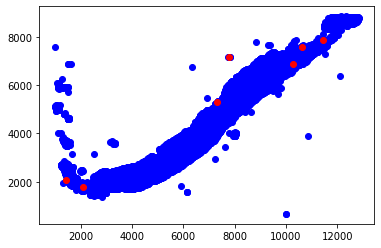

In [84]:
plt.scatter(data["X_centroid"] ,data["Y_centroid"], facecolors='blue')
plt.scatter(cells["X_centroid"], cells["Y_centroid"] , color="red")

